***Import library***

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

torch.manual_seed(0)

***Hyper Parameters***

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

batch_size = 1

dataset_dir = 'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\CAE_dataset'
BEST_MODEL_PATH = 'CAE_best_model.pth'

***Load Datasets***

In [3]:
threshold_set = datasets.ImageFolder(
    dataset_dir,
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

threshold_loader = torch.utils.data.DataLoader(threshold_set, batch_size=batch_size, shuffle=True)

***Model***

In [4]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        
        # Encoder
        self.cnn_layer1 = nn.Sequential(
                        nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
                        nn.ReLU(),
                         nn.MaxPool2d(2,2))

        self.cnn_layer2 = nn.Sequential(
                                nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))
        
        self.cnn_layer3 = nn.Sequential(
                                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))

        # Decoder        
        self.tran_cnn_layer1 = nn.Sequential(
                        nn.ConvTranspose2d(64, 32, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())
        
        self.tran_cnn_layer2 = nn.Sequential(
                        nn.ConvTranspose2d(32, 16, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())

        self.tran_cnn_layer3 = nn.Sequential(
                        nn.ConvTranspose2d(16, 3, kernel_size = 2, stride = 2, padding=0),
                        nn.Sigmoid())
            
            
    def forward(self, x):
        output = self.cnn_layer1(x)
        output = self.cnn_layer2(output)
        output = self.cnn_layer3(output)        
        output = self.tran_cnn_layer1(output)
        output = self.tran_cnn_layer2(output)
        output = self.tran_cnn_layer3(output)

        return output

In [5]:
model = ConvAutoEncoder()
model.load_state_dict(torch.load(BEST_MODEL_PATH))
model.to(device)
criterion = nn.MSELoss()

***Threshold***

In [16]:
threshold = np.arange(0.002, 0.01, 0.00001)

err_rate = []
acc_rate = []

best_err = 1.0
best_accuracy = 0.0
best_threshold = {"threshold":[], "err":[]}

for t in threshold:
    print('========== threshold = %.5f ==========' %(t))
    
    err = 0.0
    correct_num = 0.0
    best_accuracy = 0.0
    normal_err = 0
    abnormal_err = 0
    
    for data in threshold_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        output = model(images)
        loss = criterion(images, output)
    
        if labels == 0 and loss.item() < t:
            err += 1
        elif labels == 1 and loss.item() > t:
            err += 1
            
    err = err / len(threshold_loader)
    
    acc = 1-err
    err_rate.append(err)
    acc_rate.append(acc)
    
    print(f'error rate : {err}')
    print(f'accuracy : {acc*100}%\n')
    
    if err < best_err:
        best_threshold["threshold"].append(t)
        best_threshold["err"].append(err)

========== threshold = 0.00300 ==========
error rate : 0.327212020033389
accuracy : 67.2787979966611%

========== threshold = 0.00301 ==========
error rate : 0.327212020033389
accuracy : 67.2787979966611%

========== threshold = 0.00302 ==========
error rate : 0.327212020033389
accuracy : 67.2787979966611%

========== threshold = 0.00303 ==========
error rate : 0.327212020033389
accuracy : 67.2787979966611%

========== threshold = 0.00304 ==========
error rate : 0.327212020033389
accuracy : 67.2787979966611%

========== threshold = 0.00305 ==========
error rate : 0.327212020033389
accuracy : 67.2787979966611%

========== threshold = 0.00306 ==========
error rate : 0.327212020033389
accuracy : 67.2787979966611%

========== threshold = 0.00307 ==========
error rate : 0.327212020033389
accuracy : 67.2787979966611%

========== threshold = 0.00308 ==========
error rate : 0.327212020033389
accuracy : 67.2787979966611%

========== threshold = 0.00309 ==========
error rate : 0.327212020033389


error rate : 0.332220367278798
accuracy : 66.7779632721202%

========== threshold = 0.00381 ==========
error rate : 0.332220367278798
accuracy : 66.7779632721202%

========== threshold = 0.00382 ==========
error rate : 0.332220367278798
accuracy : 66.7779632721202%

========== threshold = 0.00383 ==========
error rate : 0.332220367278798
accuracy : 66.7779632721202%

========== threshold = 0.00384 ==========
error rate : 0.332220367278798
accuracy : 66.7779632721202%

========== threshold = 0.00385 ==========
error rate : 0.332220367278798
accuracy : 66.7779632721202%

========== threshold = 0.00386 ==========
error rate : 0.332220367278798
accuracy : 66.7779632721202%

========== threshold = 0.00387 ==========
error rate : 0.332220367278798
accuracy : 66.7779632721202%

========== threshold = 0.00388 ==========
error rate : 0.332220367278798
accuracy : 66.7779632721202%

========== threshold = 0.00389 ==========
error rate : 0.332220367278798
accuracy : 66.7779632721202%

========== t

error rate : 0.5333889816360601
accuracy : 46.66110183639399%

========== threshold = 0.00460 ==========
error rate : 0.5350584307178631
accuracy : 46.49415692821369%

========== threshold = 0.00461 ==========
error rate : 0.5371452420701168
accuracy : 46.285475792988315%

========== threshold = 0.00462 ==========
error rate : 0.5421535893155259
accuracy : 45.78464106844741%

========== threshold = 0.00463 ==========
error rate : 0.5479966611018364
accuracy : 45.200333889816356%

========== threshold = 0.00464 ==========
error rate : 0.5525876460767947
accuracy : 44.74123539232053%

========== threshold = 0.00465 ==========
error rate : 0.5580133555926544
accuracy : 44.19866444073456%

========== threshold = 0.00466 ==========
error rate : 0.5630217028380634
accuracy : 43.69782971619366%

========== threshold = 0.00467 ==========
error rate : 0.5701168614357263
accuracy : 42.988313856427375%

========== threshold = 0.00468 ==========
error rate : 0.5767946577629383
accuracy : 42.320534

error rate : 0.8030050083472454
accuracy : 19.69949916527546%

========== threshold = 0.00538 ==========
error rate : 0.8030050083472454
accuracy : 19.69949916527546%

========== threshold = 0.00539 ==========
error rate : 0.8030050083472454
accuracy : 19.69949916527546%

========== threshold = 0.00540 ==========
error rate : 0.8030050083472454
accuracy : 19.69949916527546%

========== threshold = 0.00541 ==========
error rate : 0.8030050083472454
accuracy : 19.69949916527546%

========== threshold = 0.00542 ==========
error rate : 0.8046744574290484
accuracy : 19.532554257095157%

========== threshold = 0.00543 ==========
error rate : 0.8055091819699499
accuracy : 19.449081803005008%

========== threshold = 0.00544 ==========
error rate : 0.8055091819699499
accuracy : 19.449081803005008%

========== threshold = 0.00545 ==========
error rate : 0.8063439065108514
accuracy : 19.36560934891486%

========== threshold = 0.00546 ==========
error rate : 0.8063439065108514
accuracy : 19.365609

error rate : 0.8347245409015025
accuracy : 16.52754590984975%

========== threshold = 0.00617 ==========
error rate : 0.8347245409015025
accuracy : 16.52754590984975%

========== threshold = 0.00618 ==========
error rate : 0.8347245409015025
accuracy : 16.52754590984975%

========== threshold = 0.00619 ==========
error rate : 0.8347245409015025
accuracy : 16.52754590984975%

========== threshold = 0.00620 ==========
error rate : 0.8347245409015025
accuracy : 16.52754590984975%

========== threshold = 0.00621 ==========
error rate : 0.8347245409015025
accuracy : 16.52754590984975%

========== threshold = 0.00622 ==========
error rate : 0.8347245409015025
accuracy : 16.52754590984975%

========== threshold = 0.00623 ==========
error rate : 0.8347245409015025
accuracy : 16.52754590984975%

========== threshold = 0.00624 ==========
error rate : 0.8347245409015025
accuracy : 16.52754590984975%

========== threshold = 0.00625 ==========
error rate : 0.8347245409015025
accuracy : 16.527545909

error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00695 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00696 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00697 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00698 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00699 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00700 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00701 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00702 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00703 ==========
error rate : 0.8764607679465777
accuracy : 12.

error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00773 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00774 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00775 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00776 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00777 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00778 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00779 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00780 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00781 ==========
error rate : 0.8764607679465777
accuracy : 12.

error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00851 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00852 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00853 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00854 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00855 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00856 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00857 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00858 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00859 ==========
error rate : 0.8764607679465777
accuracy : 12.

error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00929 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00930 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00931 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00932 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00933 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00934 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00935 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00936 ==========
error rate : 0.8764607679465777
accuracy : 12.353923205342232%

========== threshold = 0.00937 ==========
error rate : 0.8764607679465777
accuracy : 12.

***Graph***

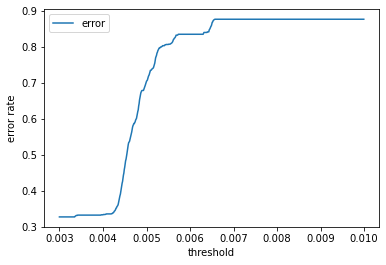

In [17]:
plt.xlabel('threshold')
plt.ylabel('error rate')
plt.plot(threshold, err_rate, label = 'error')
plt.legend()
plt.show()

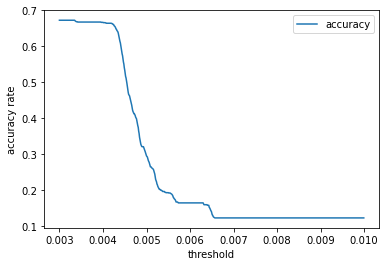

In [18]:
plt.xlabel('threshold')
plt.ylabel('accuracy rate')
plt.plot(threshold, acc_rate, label = 'accuracy')
plt.legend()
plt.show()